# Imports & Config

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Config
color_pal = sns.color_palette()
plt.style.use('ggplot')

# Data Loading: Logistic Regression Example

In [2]:
# Generate the data
X, y = make_classification(
    n_samples=1000,       # number of samples
    n_features=5,         # total features
    n_informative=3,      # informative features (that impact y)
    n_redundant=0,        # no redundant features
    n_repeated=0,         # no repeated features
    n_classes=2,          # binary classification (0 or 1)
    random_state=42,      # reproducibility
    class_sep=1.5        # make classes more separable
)

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 6)])
df['target'] = y

df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-0.529332,-0.093387,-2.026572,0.906847,-1.119699,0
1,-0.978500,-1.690672,1.729308,-0.203071,0.702055,1
2,-2.171571,0.545787,1.753433,2.027726,2.280785,1
3,-0.151299,-0.365506,1.835714,0.538355,-0.505317,1
4,-0.777371,1.146030,-2.979343,-0.202986,1.018522,0


In [3]:
X.shape, y.shape

((1000, 5), (1000,))

# Step 1: Data Understanding

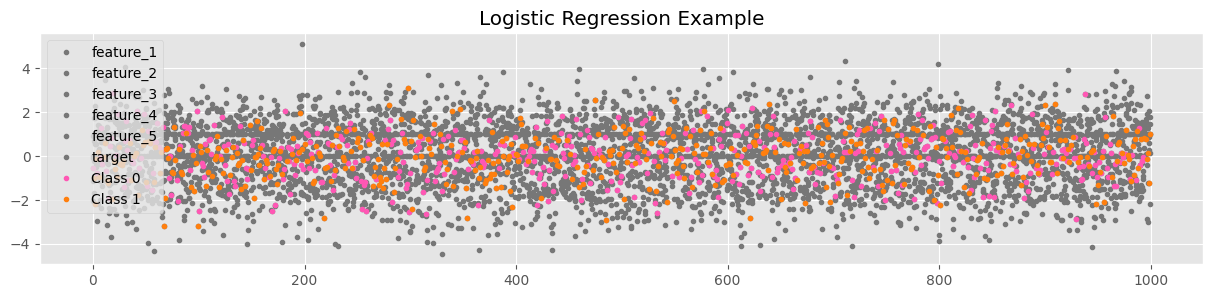

In [ ]:
color_pal = ['#ff57b4', '#ff7f0e', '#777777']

df.plot(style='.',
        figsize=(15, 3),
        color=color_pal[2],
        title='Logistic Regression Example')

# Plot class 0
df[df['target'] == 0]['feature_1'].plot(
    style='.', color=color_pal[0], label='Class 0')

# Plot class 1
df[df['target'] == 1]['feature_1'].plot(
    style='.', color=color_pal[1], label='Class 1')

plt.title('Logistic Regression Example')
plt.legend()
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

# Create new DataFrame with scaled values and original target
df_scaled = pd.DataFrame(X_scaled, columns=features)
df_scaled['target'] = df['target']

### Histograms

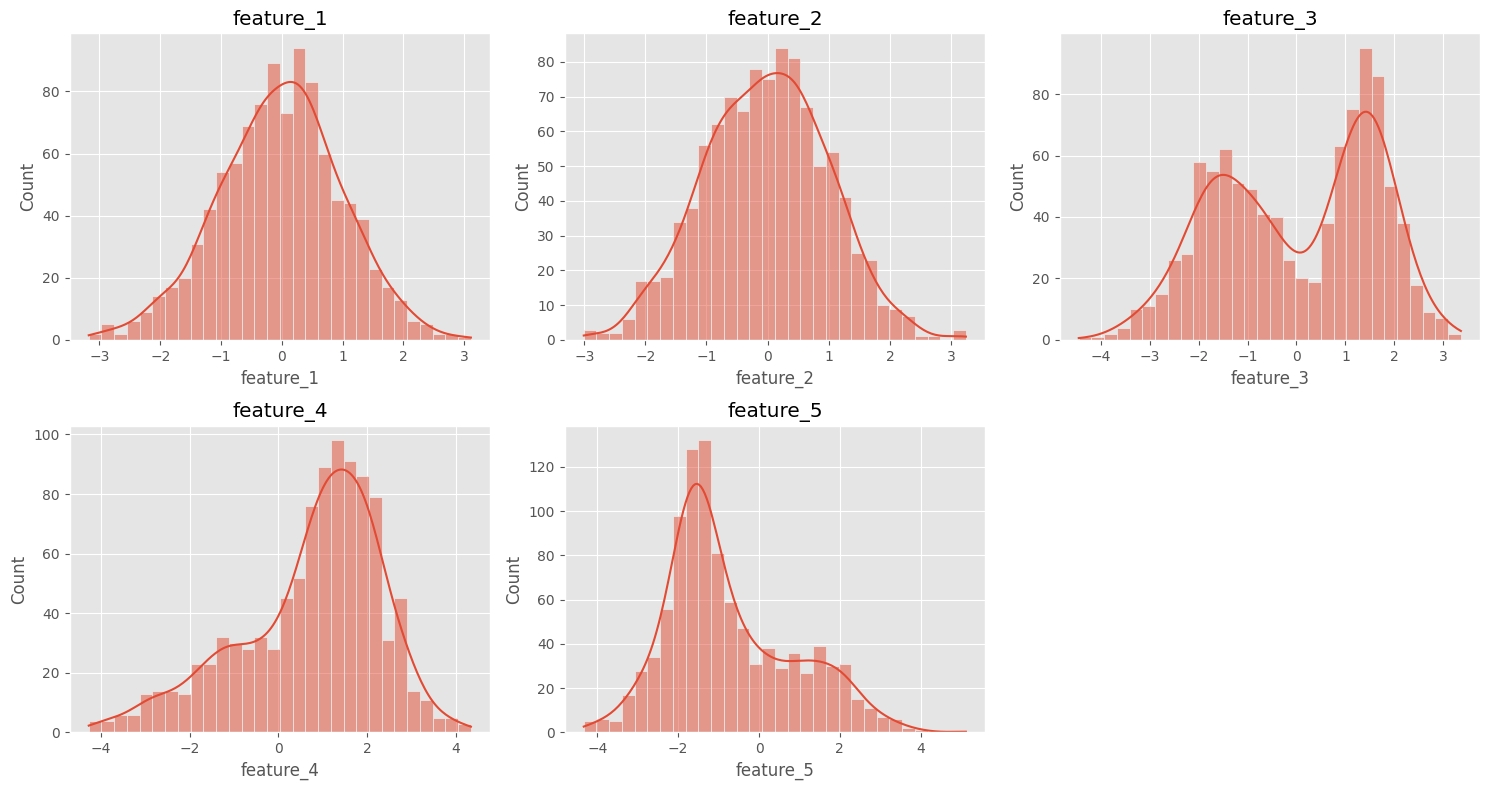

In [38]:
# Plot histograms for train data
features = df.drop('target', axis=1).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

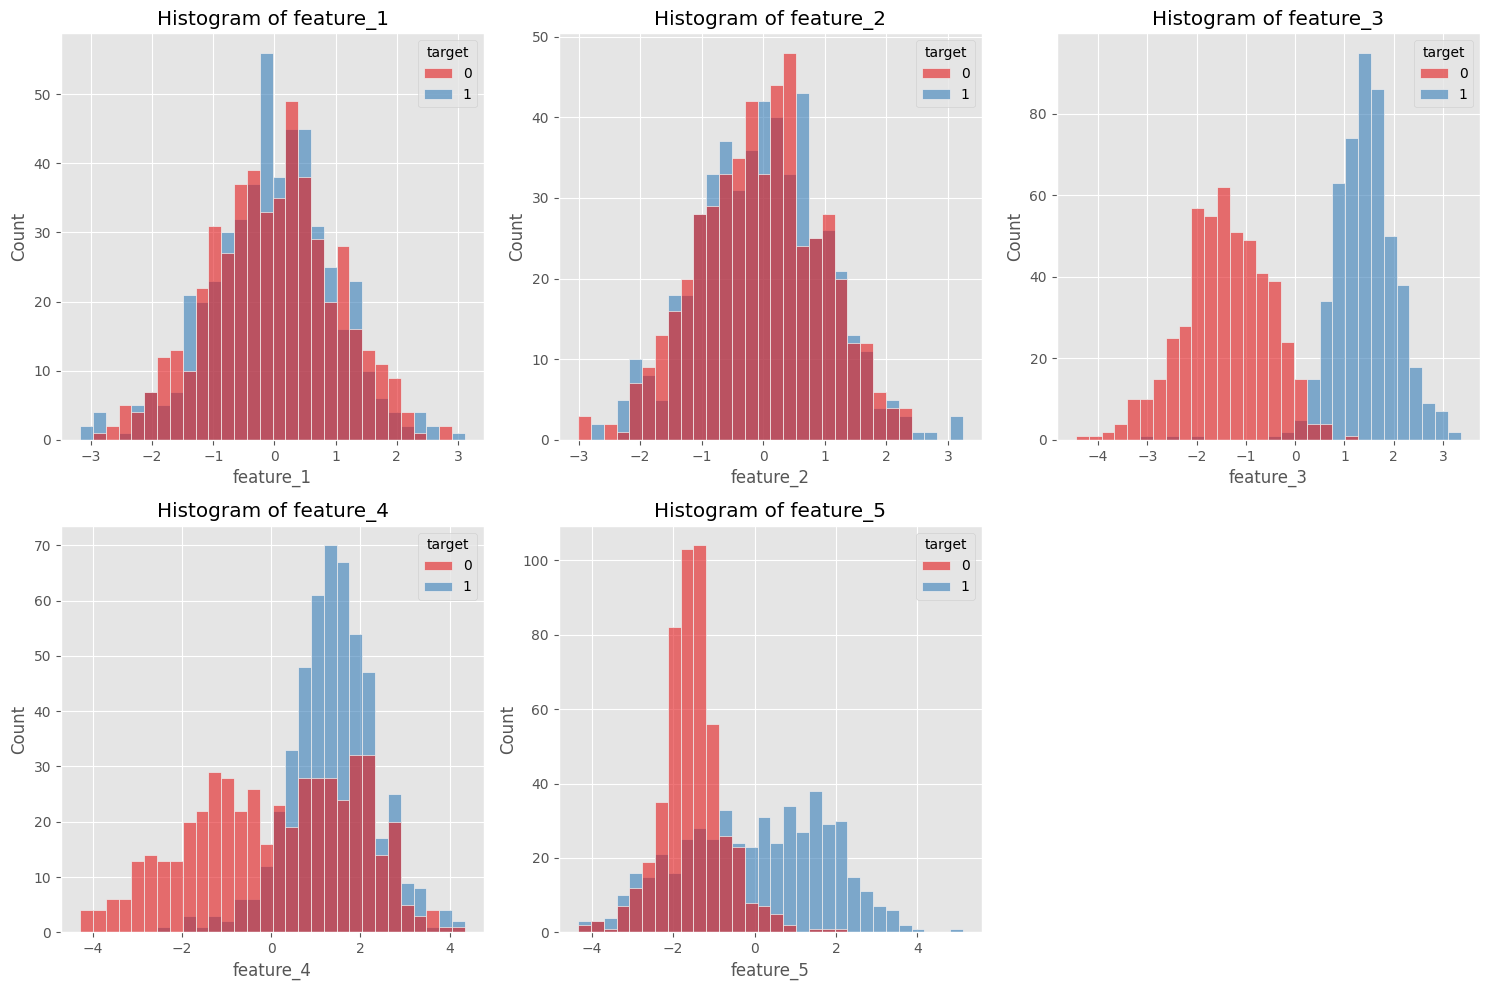

In [39]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, hue='target', bins=30, palette='Set1', alpha=0.6)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

### Violinplots

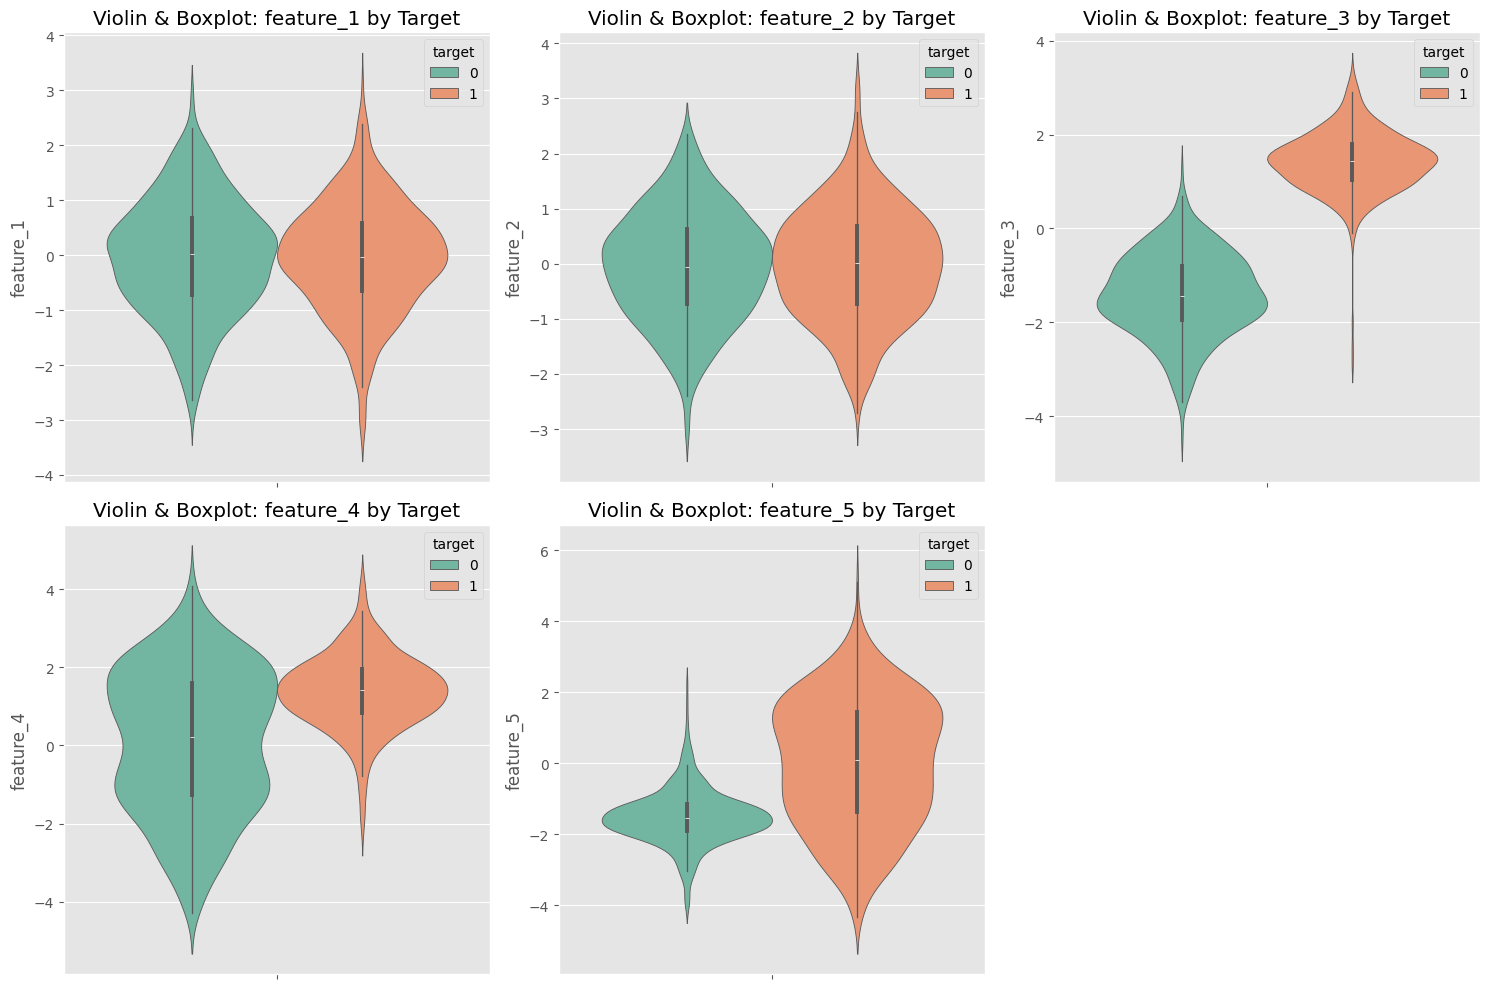

In [40]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(data=df, hue='target', y=col, palette='Set2', inner='box')
    plt.title(f'Violin & Boxplot: {col} by Target')
plt.tight_layout()
plt.show()

### Boxplots

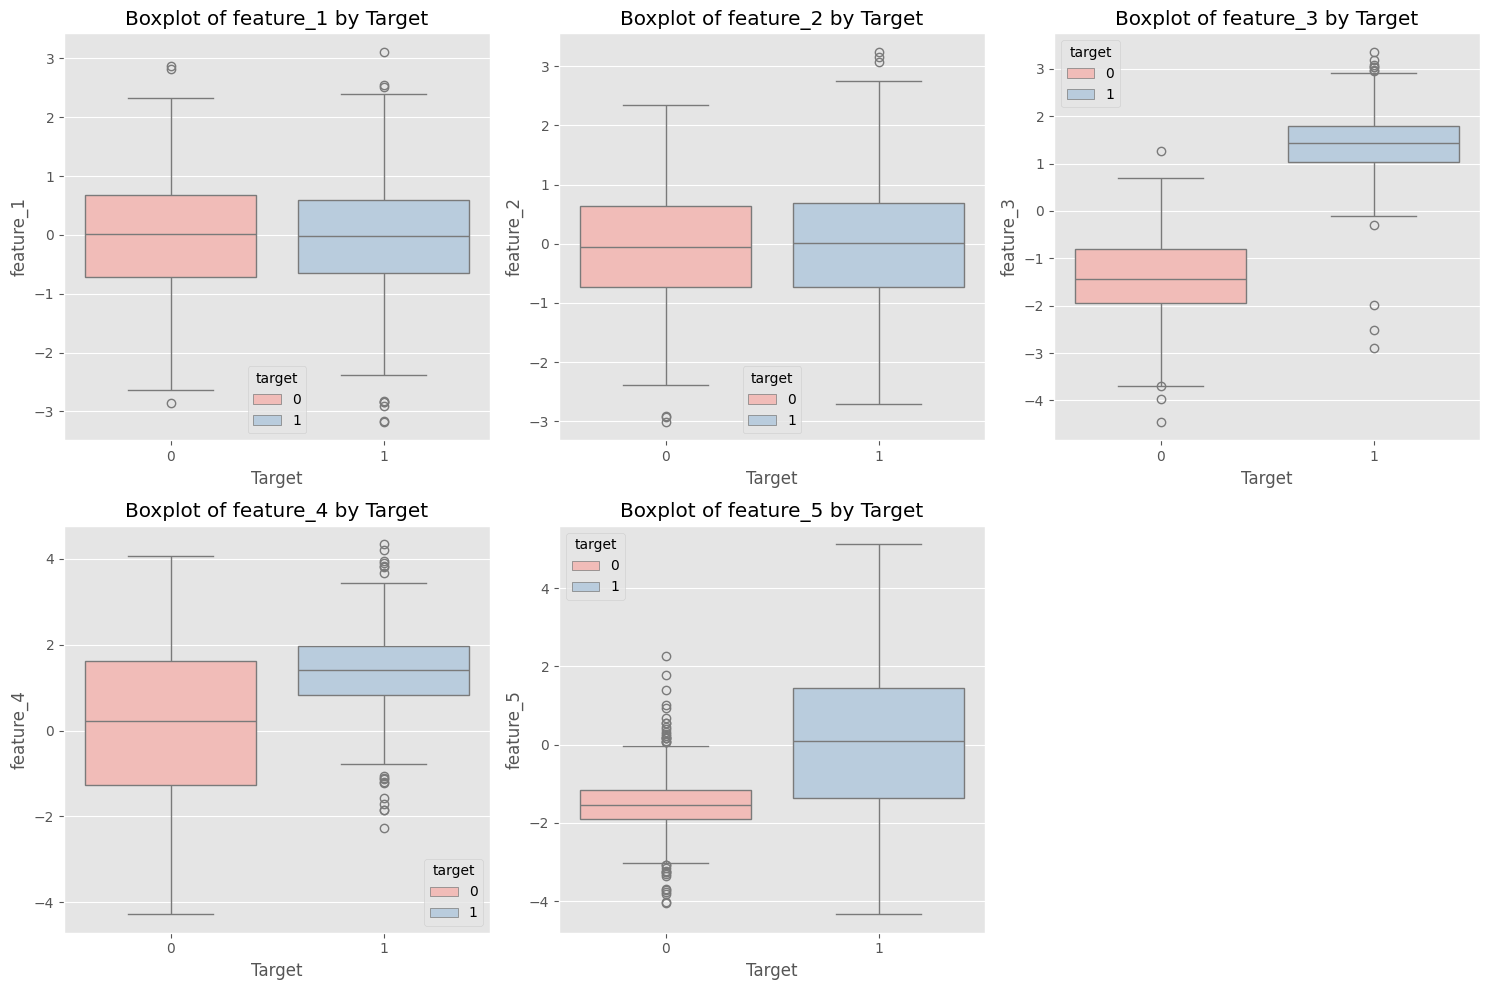

In [48]:
# List of feature column names (excluding the target)
features = df.drop('target', axis=1).columns

# Create boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)  # adjust layout based on number of features
    sns.boxplot(data=df, x='target', hue='target', y=col, palette='Pastel1')
    plt.title(f'Boxplot of {col} by Target')
    plt.xlabel('Target')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

## Inspect Outliers

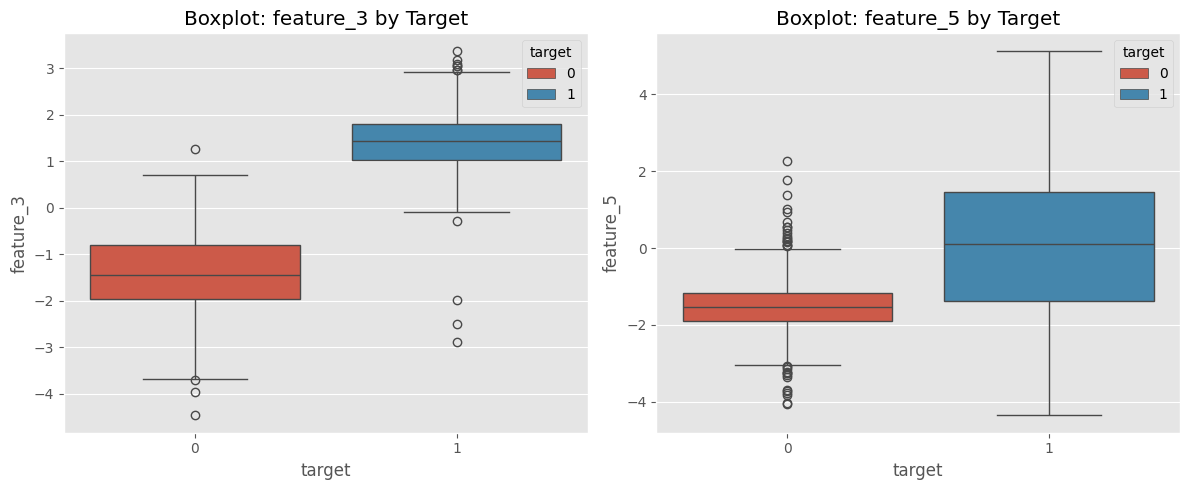

In [59]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='feature_3', x='target', hue='target')
plt.title('Boxplot: feature_3 by Target')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='feature_5', x='target', hue='target')
plt.title('Boxplot: feature_5 by Target')

plt.tight_layout()
plt.show()

In [54]:
def get_iqr_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

# Get bounds
f3_low, f3_high = get_iqr_bounds(df, 'feature_3')
f5_low, f5_high = get_iqr_bounds(df, 'feature_5')

In [55]:
print("Outliers in feature_3:")
print(outliers_f3[['feature_3', 'target']])

print("\nOutliers in feature_5:")
print(outliers_f5[['feature_5', 'target']])

Outliers in feature_3:
Empty DataFrame
Columns: [feature_3, target]
Index: []

Outliers in feature_5:
     feature_5  target
198   5.119524       1
344   3.310113       1
366   3.620739       1
388   3.829912       1
458   3.411000       1
577   3.959918       1
705   3.395891       1
909   3.300755       1
963   3.275710       1
975   3.417665       1


In [56]:
# df wirth outliers removed
df_removed = df[
    (df['feature_3'] >= f3_low) & (df['feature_3'] <= f3_high) &
    (df['feature_5'] >= f5_low) & (df['feature_5'] <= f5_high)
]

# df with outliers capped
df_capped = df.copy()
df_capped['feature_3'] = df_capped['feature_3'].clip(f3_low, f3_high)
df_capped['feature_5'] = df_capped['feature_5'].clip(f5_low, f5_high)

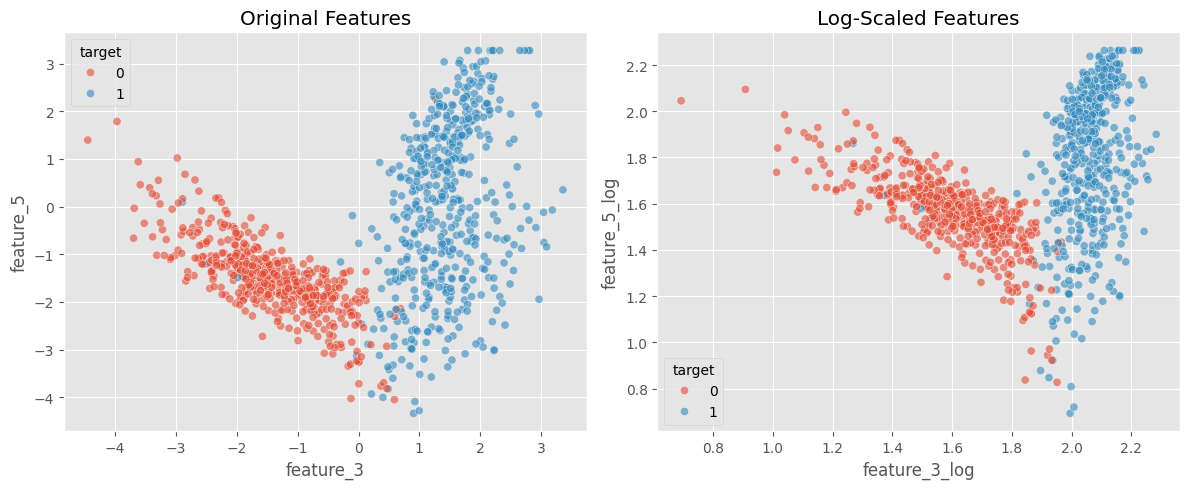

In [58]:
# Use capped version to reduce skew
data = df_capped.copy()

# Avoid log(0) by shifting values if needed
data['feature_3_log'] = np.log1p(data['feature_3'] - data['feature_3'].min() + 1)
data['feature_5_log'] = np.log1p(data['feature_5'] - data['feature_5'].min() + 1)

plt.figure(figsize=(12, 5))

# Original
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='feature_3', y='feature_5', hue='target', alpha=0.6)
plt.title("Original Features")

# Log-transformed
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='feature_3_log', y='feature_5_log', hue='target', alpha=0.6)
plt.title("Log-Scaled Features")

plt.tight_layout()
plt.show()

### Scatterplot

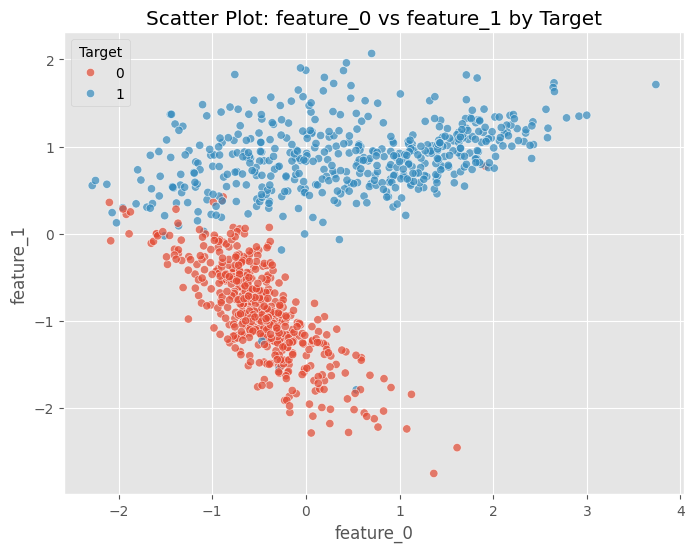

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x='feature_5', y='feature_3', hue='target', alpha=0.7)
plt.title('Scatter Plot: feature_0 vs feature_1 by Target')
plt.xlabel('feature_0')
plt.ylabel('feature_1')
plt.legend(title='Target')
plt.grid(True)
plt.show()

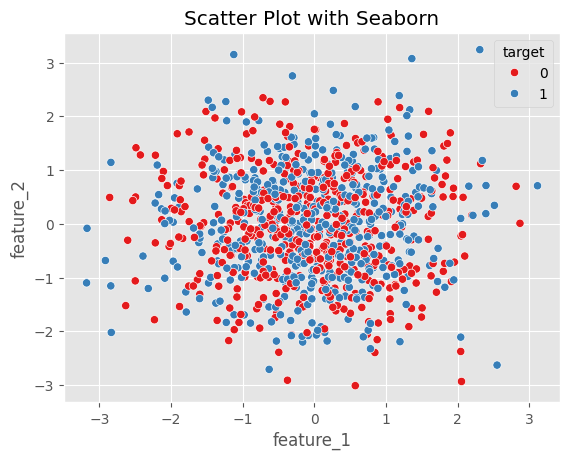

In [4]:
# We plot the relationship between the feature and classes. 
sns.scatterplot(data=df, x='feature_1', y='feature_2', hue='target', palette='Set1')
plt.title('Scatter Plot with Seaborn')
plt.show()

# Step 3: Model Selection & Training

### Train-Test-Split

In [6]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       108

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Text(0, 0.5, 'Feature 2')

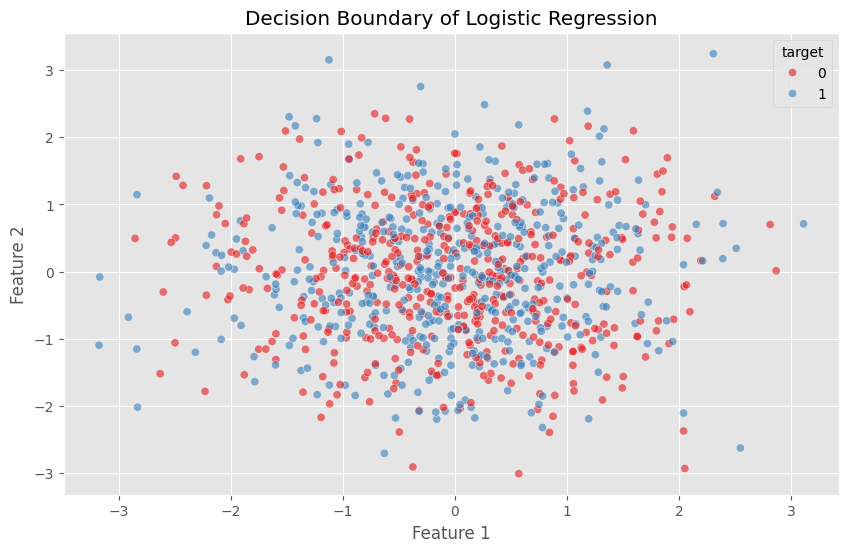

In [11]:
# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate the model
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='feature_1', y='feature_2', hue='target', palette='Set1', alpha=0.6)
plt.title('Decision Boundary of Logistic Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')